### 红酒分类

通过对意大利红酒的部分数据, 调用 Sklearn 包来分别实现 0-1 标准化, z-score 标准化.

## 1 数据源

我们使用的是UCI的[Wine Data Set](http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data)，该数据集显示三种意大利酒化学分析的结果，共178个样本，每个样本有13个特征变量，1个类别变量。为简化实验，更清晰展现实验结果，仅选取两个特征变量进行展示。

>**Alcohol**：酒精含量

>**Malic acid**：羟基丁二酸含量

>**Class**：红酒分类情况


## 2 数据探索

首先，导入之后会用到的包：

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
wine = pd.read_csv("/home/xm/Program/ALL-Data/wine-read-dataset.csv")
wine.head(5)

,Class,Alcohol,Malic acid,Unnamed:3,Unnamed:4,Unnamed:5,Unnamed:6,Unnamed:7,Unnamed:8,Unnamed:9,Unnamed:10,Unnamed:11,Unnamed:12,Unnamed:13,Unnamed:14
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,NaN
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,NaN
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,NaN
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,NaN
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,NaN


 由上表可知, 两个特征 `Alcohol` 和 `Malic acid` 取值范围不同, 我们直接调用sklearn中的包, 分别对该两个特征变量进行 `0-1` 标准化和 `z-score` 标准化.

In [4]:
# 0-1标准化
minmax_scale = preprocessing.MinMaxScaler().fit(wine[['Alcohol', 'Malic acid']])
np_minmax = minmax_scale.transform(wine[['Alcohol', 'Malic acid']])

# z-score标准化
std_scale = preprocessing.StandardScaler().fit(wine[['Alcohol', 'Malic acid']])
np_std = std_scale.transform(wine[['Alcohol', 'Malic acid']])

In [5]:
# 0-1标准化后，两个特征变量的最大值和最小值
print('Min-value after 0-1 scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(np_minmax[:,0].min(),np_minmax[:,1].min()))
print('\nMax-value after 0-1 scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(np_minmax[:,0].max(), np_minmax[:,1].max()))

print("\n----------------------------\n")

# z-score标准化后，两个特征变量的均值和方差
print('Mean after z-score standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(np_std[:,0].mean(), np_std[:,1].mean()))
print('\nStandard deviation after z-score standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(np_std[:,0].std(), np_std[:,1].std()))

Min-value after 0-1 scaling:
Alcohol=0.00, Malic acid=0.00

Max-value after 0-1 scaling:
Alcohol=1.00, Malic acid=1.00

----------------------------

Mean after z-score standardization:
Alcohol=-0.00, Malic acid=-0.00

Standard deviation after z-score standardization:
Alcohol=1.00, Malic acid=1.00


我们再来看看标准化后前五行的数据。
0-1标准化后：
<div style="max-height:1000px;max-width:1500px;overflow:auto;">
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Class</th>
      <th>Alcohol</th>
      <th>Malic acid</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td> 0.84210526</td>
      <td> 0.1916996</td>
    </tr>
    <tr>
      <th>1</th>
      <td> 0.57105263</td>
      <td> 0.2055336</td>
    </tr>
    <tr>
      <th>1</th>
      <td> 0.56052632</td>
      <td> 0.3201581</td>
    </tr>
    <tr>
      <th>1</th>
      <td> 0.87894737</td>
      <td> 0.23913043</td>
    </tr>
    <tr>
      <th>1</th>
      <td> 0.58157895</td>
      <td> 0.36561265</td>
    </tr>
  </tbody>
</table>
<p><div align="left">5 rows × 3 columns</div></p>
</div>

z-score标准化后：

<div style="max-height:1000px;max-width:1500px;overflow:auto;">
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Class</th>
      <th>Alcohol</th>
      <th>Malic acid</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td> 1.51861254</td>
      <td> -0.5622498</td>
    </tr>
    <tr>
      <th>1</th>
      <td> 0.24628963</td>
      <td> -0.49941338</td>
    </tr>
    <tr>
      <th>1</th>
      <td> 0.19687903</td>
      <td> 0.02123125</td>
    </tr>
    <tr>
      <th>1</th>
      <td> 1.69154964</td>
      <td> -0.34681064</td>
    </tr>
    <tr>
      <th>1</th>
      <td> 0.29570023</td>
      <td> 0.22769377</td>
    </tr>
  </tbody>
</table>
<p><div align="left">5 rows × 3 columns</div></p>
</div>


In [7]:
df_minmax = wine.copy()
df_std = wine.copy()

df_minmax[['Alcohol', 'Malic acid']] = np_minmax
df_std[['Alcohol', 'Malic acid']] = np_std

wine_contrast = pd.concat([wine, df_minmax, df_std], axis = 0)

<Figure size 720x720 with 0 Axes>

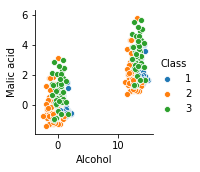

In [8]:
plt.figure(figsize = (10, 10))
sns.pairplot(hue = "Class", data = wine_contrast, x_vars = "Alcohol", y_vars = "Malic acid")
plt.show()

## 3 0-1标准化和z-score标准化的具体实现

上述实现标准化是通过调用sklearn中的包，下面我们进一步探究其原理，自行编写相应代码。

0-1标准化为使处理过后数据均落在［0，1］区间内。其处理函数为：
$$
x_i^* = \frac{x_i-min}{max-min}
$$
其中：$x_i^*$为标准化后的各数据点取值，$x_i$为原始各数据点取值，$min$为该数据系列中的最小值，$max$为该数据系列中的最大值。

Z-Score标准化为使处理后的数据近似符合（0，1）的标准正态分布。其处理函数为：
$$
x_i^* = \frac{x_i-\mu}{\sigma}
$$
其中：$x_i^*$为标准化后的各数据点取值，$x_i$为原始各数据点取值，$\mu$为该数据系列的平均值，$\sigma$为该数据系列的标准差。

根据上述公式，易写出如下代码：

```Python

# 0-1 scaling
np_minmax = (x_np - x_np.min()) / (x_np.max() - x_np.min())
# z-score Standardization
x_np = np.asarray(x)
z_scores_np = (x_np - x_np.mean()) / x_np.std()

```